# Retail Sales SQL

### Step 1: Import Libraries

In [1]:
import pandas as pd
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Data

In [2]:
# Load the Excel file into a DataFrame
file_path = 'Online_Retail/online_retail_II.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(df.head())

# Rename columns to simplify SQL queries
df.columns = [col.replace(' ', '_').replace('-', '_') for col in df.columns]

# Connect to SQLite database
db_path = 'online_retail.db'
if os.path.exists(db_path):
    os.remove(db_path)  # Remove existing database for a fresh start
conn = sqlite3.connect(db_path)

# Save the DataFrame to SQLite
table_name = 'retail_sales'
df.to_sql(table_name, conn, if_exists='replace', index=False)
print(f"\nData loaded into SQLite database table '{table_name}'.")

Dataset Preview:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

Data loaded into SQLite database table 'retail_sales'.


In [3]:
# Display table schema
query = f"PRAGMA table_info({table_name});"
schema = pd.read_sql_query(query, conn)
print("\nTable Schema:")
print(schema)

# Display sample data
query = f"SELECT * FROM {table_name} LIMIT 5;"
sample_data = pd.read_sql_query(query, conn)
print("\nSample Data:")
print(sample_data)


Table Schema:
   cid         name       type  notnull dflt_value  pk
0    0      Invoice       TEXT        0       None   0
1    1    StockCode       TEXT        0       None   0
2    2  Description       TEXT        0       None   0
3    3     Quantity    INTEGER        0       None   0
4    4  InvoiceDate  TIMESTAMP        0       None   0
5    5        Price       REAL        0       None   0
6    6  Customer_ID       REAL        0       None   0
7    7      Country       TEXT        0       None   0

Sample Data:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer_ID         Coun

### Step 3: Analyze the Data Using SQL Queries

In [5]:
query = f"""
SELECT Country, SUM(Quantity * Price) AS TotalSales
FROM {table_name}
GROUP BY Country
ORDER BY TotalSales DESC;
"""
country_sales = pd.read_sql_query(query, conn)
print("\nTotal Sales Per Country:")
print(country_sales)



Total Sales Per Country:
                 Country   TotalSales
0         United Kingdom  8194777.533
1                   EIRE   352242.730
2            Netherlands   263863.410
3                Germany   196290.351
4                 France   130769.900
5                 Sweden    51213.510
6                Denmark    46972.950
7            Switzerland    43343.410
8                  Spain    37084.900
9              Australia    30051.800
10              Portugal    23769.780
11               Belgium    22663.530
12       Channel Islands    21367.320
13                Greece    14284.970
14                 Italy    13788.840
15               Austria    13023.280
16                Cyprus    11216.450
17                 Japan     8435.960
18  United Arab Emirates     8046.370
19               Finland     7187.710
20           Unspecified     4937.530
21             Lithuania     4892.680
22                   USA     4555.620
23                Norway     4079.570
24             Singapore

In [6]:
query = f"""
SELECT Description, SUM(Quantity) AS TotalQuantity
FROM {table_name}
GROUP BY Description
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
top_products = pd.read_sql_query(query, conn)
print("\nTop 10 Most Purchased Products:")
print(top_products)



Top 10 Most Purchased Products:
                          Description  TotalQuantity
0  WHITE HANGING HEART T-LIGHT HOLDER          57733
1   WORLD WAR 2 GLIDERS ASSTD DESIGNS          54698
2                 BROCADE RING PURSE           47647
3    PACK OF 72 RETRO SPOT CAKE CASES          46106
4       ASSORTED COLOUR BIRD ORNAMENT          44925
5         60 TEATIME FAIRY CAKE CASES          36326
6  PACK OF 60 PINK PAISLEY CAKE CASES          31822
7             JUMBO BAG RED RETROSPOT          30727
8                SMALL POPCORN HOLDER          29500
9      STRAWBERRY CERAMIC TRINKET BOX          26563


In [7]:
query = f"""
SELECT strftime('%Y-%m', InvoiceDate) AS Month, SUM(Quantity * Price) AS MonthlySales
FROM {table_name}
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pd.read_sql_query(query, conn)
print("\nMonthly Sales Trends:")
print(monthly_sales)



Monthly Sales Trends:
      Month  MonthlySales
0   2009-12    799847.110
1   2010-01    624032.892
2   2010-02    533091.426
3   2010-03    765848.761
4   2010-04    590580.432
5   2010-05    615322.830
6   2010-06    679786.610
7   2010-07    575236.360
8   2010-08    656776.340
9   2010-09    853650.431
10  2010-10   1045168.350
11  2010-11   1422654.642
12  2010-12    377488.450


In [8]:
query = f"""
SELECT Customer_ID, SUM(Quantity * Price) AS TotalSpent
FROM {table_name}
GROUP BY Customer_ID
ORDER BY TotalSpent DESC
LIMIT 10;
"""
top_customers = pd.read_sql_query(query, conn)
print("\nTop 10 Customers by Total Spend:")
print(top_customers)



Top 10 Customers by Total Spend:
   Customer_ID  TotalSpent
0          NaN  1191276.06
1      18102.0   341776.73
2      14646.0   243853.05
3      14156.0   183180.55
4      14911.0   137675.91
5      13694.0   128172.42
6      17511.0    83760.60
7      15061.0    82162.74
8      16684.0    75610.17
9      13089.0    55828.31


In [9]:
query = f"""
SELECT strftime('%Y-%m-%d', InvoiceDate) AS Day, SUM(Quantity * Price) AS DailySales
FROM {table_name}
GROUP BY Day
ORDER BY DailySales DESC
LIMIT 10;
"""
best_days = pd.read_sql_query(query, conn)
print("\nBest Selling Days:")
print(best_days)



Best Selling Days:
          Day  DailySales
0  2010-11-15  104983.550
1  2010-09-27   97814.700
2  2010-11-04   88738.310
3  2010-10-14   86077.650
4  2010-11-08   83788.851
5  2010-11-10   79721.720
6  2010-11-29   79069.770
7  2009-12-14   72898.240
8  2010-01-07   72307.920
9  2010-11-25   71788.180


### Step 4: Visualization

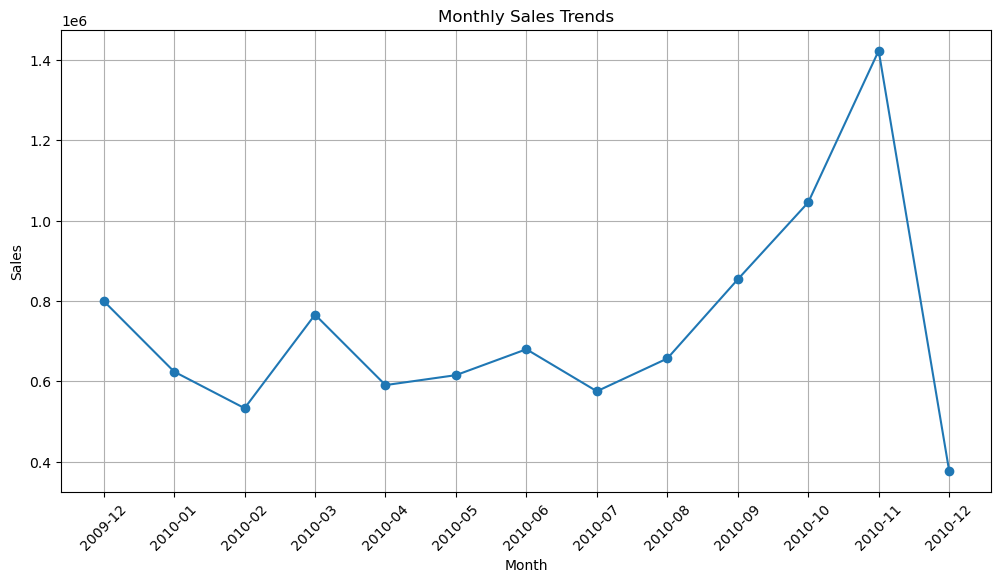

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['MonthlySales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\milto\AppData\Local\Temp\ipykernel_5160\764084320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x='TotalSales', y='Country', palette='viridis')


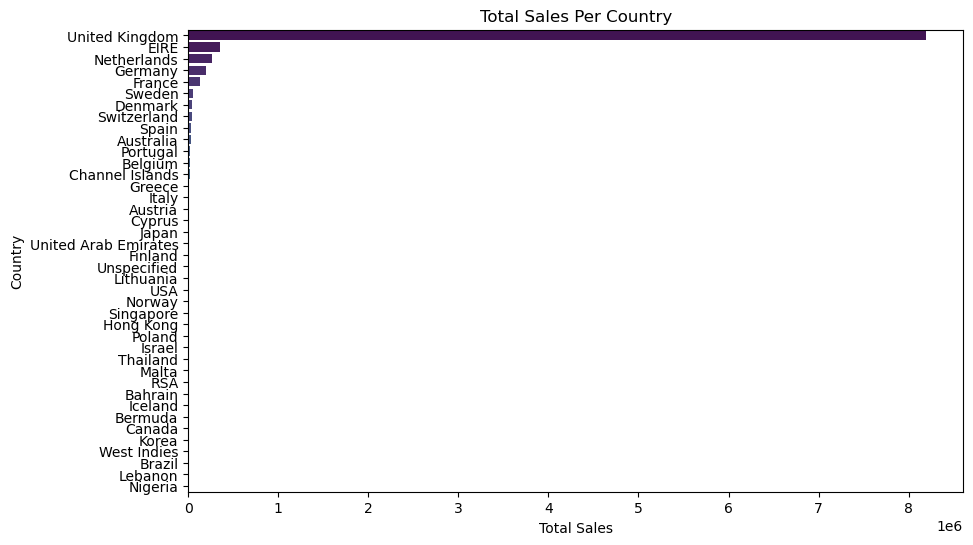

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales, x='TotalSales', y='Country', palette='viridis')
plt.title('Total Sales Per Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


In [13]:
country_sales.to_csv('country_sales.csv', index=False)
top_products.to_csv('top_products.csv', index=False)
monthly_sales.to_csv('monthly_sales.csv', index=False)
top_customers.to_csv('top_customers.csv', index=False)
best_days.to_csv('best_days.csv', index=False)
print("\nKey results saved to CSV files.")



Key results saved to CSV files.
